# Variable transformers : YeoJohnsonTransformer

The YeoJohnsonTransformer() applies the Yeo-Johnson transformation to the
numerical variables.

**For this demonstration, we use the Ames House Prices dataset produced by Professor Dean De Cock:**

Dean De Cock (2011) Ames, Iowa: Alternative to the Boston Housing
Data as an End of Semester Regression Project, Journal of Statistics Education, Vol.19, No. 3

http://jse.amstat.org/v19n3/decock.pdf

https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627

The version of the dataset used in this notebook can be obtained from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from feature_engine.imputation import ArbitraryNumberImputer
from feature_engine.transformation import YeoJohnsonTransformer

In [2]:
# load data

data = pd.read_csv('houseprice.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['Id', 'SalePrice'], axis=1), data['SalePrice'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((1022, 79), (438, 79))

In [4]:
# initialize transformer to transform 2 variables

yjt = YeoJohnsonTransformer(variables = ['LotArea', 'GrLivArea'])

# find otpimal lambdas for the transformation
yjt.fit(X_train)

YeoJohnsonTransformer(variables=['LotArea', 'GrLivArea'])

In [5]:
# these are the lambdas for the YeoJohnson transformation

yjt.lambda_dict_

{'LotArea': 0.02258978732751055, 'GrLivArea': 0.06781061353154169}

In [6]:
# transform variables

train_t = yjt.transform(X_train)
test_t = yjt.transform(X_test)

Text(0.5, 0, 'GrLivArea')

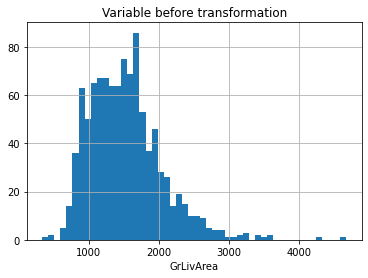

In [7]:
# variable before transformation
X_train['GrLivArea'].hist(bins=50)
plt.title('Variable before transformation')
plt.xlabel('GrLivArea')

Text(0.5, 0, 'GrLivArea')

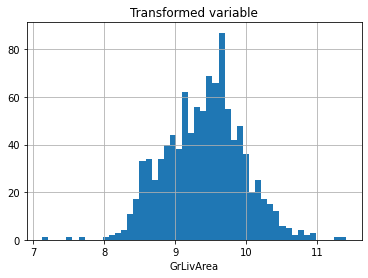

In [8]:
# transformed variable
train_t['GrLivArea'].hist(bins=50)
plt.title('Transformed variable')
plt.xlabel('GrLivArea')

Text(0.5, 0, 'LotArea')

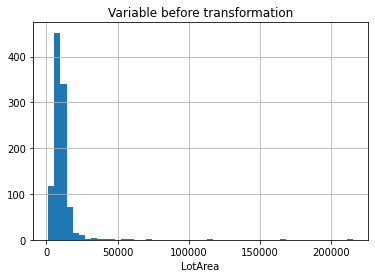

In [9]:
# tvariable before transformation
X_train['LotArea'].hist(bins=50)
plt.title('Variable before transformation')
plt.xlabel('LotArea')

Text(0.5, 0, 'LotArea')

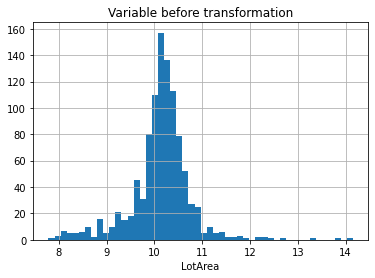

In [10]:
# transformed variable
train_t['LotArea'].hist(bins=50)
plt.title('Variable before transformation')
plt.xlabel('LotArea')

## Automatically select numerical variables

Before using YeoJohnsonTransformer we need to ensure that numerical variables do not have missing data.

In [11]:
# impute missing data

arbitrary_imputer = ArbitraryNumberImputer(arbitrary_number=2)

arbitrary_imputer.fit(X_train)

train_t = arbitrary_imputer.transform(X_train)
test_t = arbitrary_imputer.transform(X_test)

In [12]:
# intializing transformer to transform all variables

yjt = YeoJohnsonTransformer()

yjt.fit(train_t)

C:\Users\Sole\Documents\Repositories\envs\fenotebook\lib\site-packages\numpy\core\_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\Sole\Documents\Repositories\envs\fenotebook\lib\site-packages\scipy\optimize\optimize.py:2149: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


YeoJohnsonTransformer(variables=['MSSubClass', 'LotFrontage', 'LotArea',
                                 'OverallQual', 'OverallCond', 'YearBuilt',
                                 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
                                 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                                 '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                                 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
                                 'FullBath', 'HalfBath', 'BedroomAbvGr',
                                 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
                                 'GarageYrBlt', 'GarageCars', 'GarageArea',
                                 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', ...])

Note, the run time error is because we are trying to transform integers.

In [13]:
# variables that will be transformed
# (these are the numerical variables in the dataset)

yjt.variables

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [14]:
# these are the parameters for YeoJohnsonTransformer

yjt.lambda_dict_

{'MSSubClass': -0.2378306859381657,
 'LotFrontage': 0.8125118353085222,
 'LotArea': 0.02258978732751055,
 'OverallQual': 0.8643396718133388,
 'OverallCond': 0.3969558337988488,
 'YearBuilt': 22.190602427177428,
 'YearRemodAdd': 39.78218820691653,
 'MasVnrArea': -0.25239760257649463,
 'BsmtFinSF1': 0.2366258546377551,
 'BsmtFinSF2': -1.4342285901348042,
 'BsmtUnfSF': 0.48006245124988,
 'TotalBsmtSF': 0.7956604221557544,
 '1stFlrSF': 0.02379301178012459,
 '2ndFlrSF': -0.11762285496291223,
 'LowQualFinSF': -9.792554984978894,
 'GrLivArea': 0.06781061353154169,
 'BsmtFullBath': -1.6227232190570056,
 'BsmtHalfBath': -25.604493651416906,
 'FullBath': 0.7799203671146958,
 'HalfBath': -2.204536108690803,
 'BedroomAbvGr': 0.8360057761170219,
 'KitchenAbvGr': -1.594528611751712,
 'TotRmsAbvGrd': 0.13886712654681466,
 'Fireplaces': -0.3289777349413731,
 'GarageYrBlt': 2.844211228808113,
 'GarageCars': 1.3847317293866424,
 'GarageArea': 0.8241205521050128,
 'WoodDeckSF': -0.09933941199949706,
 'Op

In [15]:
# transform  variables
train_t = yjt.transform(train_t)
test_t = yjt.transform(test_t)